2.1. Data Manipulation

In [1]:
import torch
x=torch.arange(12,dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [2]:
x.numel()

12

In [3]:
x.shape

torch.Size([12])

In [4]:
X=x.reshape(3,4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [5]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [6]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [7]:
torch.randn(3,4)

tensor([[ 1.3181,  0.5587,  0.5885, -1.9484],
        [-1.0617,  0.6824,  0.0790,  0.4078],
        [ 0.7572,  1.2550,  1.5694, -0.0188]])

In [8]:
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [9]:
X[-1],X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [10]:
X[1,2]=17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [11]:
X[:2,:]=12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [12]:
torch.exp(x)

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

In [13]:
x=torch.tensor([1.0,2,4,8])
y=torch.tensor([2,2,2,2])
x+y,x-y,x*y,x/y,x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [14]:
X=torch.arange(12,dtype=torch.float32).reshape((3,4))
Y=torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
torch.cat((X,Y),dim=0),torch.cat((X,Y),dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [15]:
X==Y,X<Y,X>Y

(tensor([[False,  True, False,  True],
         [False, False, False, False],
         [False, False, False, False]]),
 tensor([[ True, False,  True, False],
         [False, False, False, False],
         [False, False, False, False]]),
 tensor([[False, False, False, False],
         [ True,  True,  True,  True],
         [ True,  True,  True,  True]]))

In [16]:
X.sum()

tensor(66.)

In [17]:
a=torch.arange(1,4).reshape((3,1))
b=torch.arange(1,3).reshape((1,2))
a,b

(tensor([[1],
         [2],
         [3]]),
 tensor([[1, 2]]))

In [18]:
a+b,a-b,a*b,a/b,a//b,a%b,a**b

(tensor([[2, 3],
         [3, 4],
         [4, 5]]),
 tensor([[ 0, -1],
         [ 1,  0],
         [ 2,  1]]),
 tensor([[1, 2],
         [2, 4],
         [3, 6]]),
 tensor([[1.0000, 0.5000],
         [2.0000, 1.0000],
         [3.0000, 1.5000]]),
 tensor([[1, 0],
         [2, 1],
         [3, 1]]),
 tensor([[0, 1],
         [0, 0],
         [0, 1]]),
 tensor([[1, 1],
         [2, 4],
         [3, 9]]))

In [19]:
before=id(Y)
Y=Y+X
id(Y)==before

False

In [20]:
Z=torch.zeros_like(Y)
print('id(Z):',id(Z))
Z[:]=X+Y
print('id(Z):',id(Z))

id(Z): 1731664745136
id(Z): 1731664745136


In [21]:
before=id(X)
X+=Y
id(X)==before

True

In [22]:
A=X.numpy()
B=torch.from_numpy(A)
type(A),type(B)

(numpy.ndarray, torch.Tensor)

In [23]:
a=torch.tensor([3.5])
a,a.item(),float(a),int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

2.2. Data Preprocessing

In [10]:
import os

os.makedirs(os.path.join('..','data'),exist_ok=True)
data_file=os.path.join('..','data','house_tiny.csv')
with open(data_file,'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [11]:
import pandas as pd

data=pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


In [12]:
inputs,target=data.iloc[:,0:2],data.iloc[:,2]
inputs=pd.get_dummies(inputs,dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN               0             1
1       2.0               0             1
2       4.0               1             0
3       NaN               0             1


In [13]:
inputs=inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0               0             1
1       2.0               0             1
2       4.0               1             0
3       3.0               0             1


In [14]:
import torch

X=torch.tensor(inputs.to_numpy(),dtype=float)
y=torch.tensor(target.to_numpy(),dtype=float)
X,y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

2.3. Linear Algebra

In [16]:
import torch

In [17]:
x=torch.tensor(3.0)
y=torch.tensor(2.0)

x+y,x*y,x/y,x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

In [18]:
x=torch.arange(3)
x

tensor([0, 1, 2])

In [19]:
x[2]

tensor(2)

In [20]:
len(x)

3

In [21]:
x.shape

torch.Size([3])

In [23]:
A=torch.arange(6).reshape(3,2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [24]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [26]:
A=torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
A==A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [27]:
torch.arange(24).reshape(2,3,4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [28]:
A=torch.arange(6,dtype=torch.float32).reshape(2,3)
B=A.clone()
A,A+B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [29]:
A*B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [30]:
a=2
X=torch.arange(24).reshape(2,3,4)
a+X,(a*X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [31]:
x=torch.arange(3,dtype=torch.float32)
x,x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [32]:
A.shape,A.sum()

(torch.Size([2, 3]), tensor(15.))

In [33]:
A.shape,A.sum(axis=0).shape

(torch.Size([2, 3]), torch.Size([3]))

In [34]:
A.shape,A.sum(axis=1).shape

(torch.Size([2, 3]), torch.Size([2]))

In [35]:
A.sum(axis=[0,1])==A.sum() #Same as A.sum()

tensor(True)

In [36]:
A.mean(),A.sum()/A.numel()

(tensor(2.5000), tensor(2.5000))

In [37]:
A.mean(axis=0),A.sum(axis=0)/A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

In [38]:
sum_A=A.sum(axis=1,keepdims=True)
sum_A,sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [39]:
A/sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [40]:
A.cumsum(axis=0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

In [41]:
y=torch.ones(3,dtype=torch.float32)
x,y,torch.dot(x,y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [42]:
torch.sum(x*y)

tensor(3.)

In [43]:
A.shape,x.shape,torch.mv(A,x),A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

In [44]:
B=torch.ones(3,4)
torch.mm(A,B),A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

In [45]:
u=torch.tensor([3.0,-4.0])
torch.norm(u)

tensor(5.)

In [46]:
torch.abs(u).sum()

tensor(7.)

In [47]:
torch.norm(torch.ones((4,9)))

tensor(6.)

2.5. Automatic Differentiation

In [48]:
import torch

In [49]:
x=torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [50]:
# Can also create x=torch.arange(4.0,requires_grad=True)
x.requires_grad_(True)
x.grad # The gradient is None by default

In [51]:
y=2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [52]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [53]:
x.grad==4*x

tensor([True, True, True, True])

In [54]:
x.grad.zero_() #Reset the gradient
y=x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [55]:
x.grad.zero_()
y=x*x
y.backward(gradient=torch.ones(len(y))) # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [56]:
x.grad.zero_()
y=x*x
u=y.detach()
z=u*x

z.sum().backward()
x.grad==u

tensor([True, True, True, True])

In [57]:
x.grad.zero_()
y.sum().backward()
x.grad==2*x

tensor([True, True, True, True])

In [58]:
def f(a):
    b=a*2
    while b.norm()<1000:
        b=b*2
    if b.sum()>0:
        c=b
    else:
        c=100*b
    return c

In [59]:
a=torch.randn(size=(),requires_grad=True)
d=f(a)
d.backward()

In [60]:
a.grad==d/a

tensor(True)

3.1. Linear Regression

In [119]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [120]:
n=10000
a=torch.ones(n)
b=torch.ones(n)

In [121]:
c=torch.zeros(n)
t=time.time()
for i in range(n):
    c[i]=a[i]+b[i]
f'{time.time()-t:.5f} sec'

'0.11866 sec'

In [122]:
t=time.time()
d=a+b
f'{time.time()-t:.5f} sec'

'0.00100 sec'

In [123]:
def normal(x,mu,sigma):
    p=1/math.sqrt(2*math.pi*sigma**2)
    return p*np.exp(-0.5/sigma**2*(x-mu)**2)

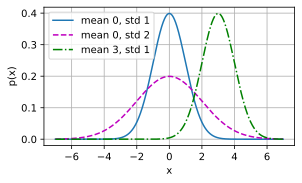

In [124]:
# Use numpy again for visualization
x=np.arange(-7,7,0.01)

# Mean and standard deviation pairs
params=[(0,1),(0,2),(3,1)]
d2l.plot(x,[normal(x,mu,sigma) for mu,sigma in params],xlabel='x',
         ylabel='p(x)',figsize=(4.5,2.5),
         legend=[f'mean {mu}, std {sigma}' for mu,sigma in params])

3.2. Object-Oriented Design for Implementation

In [125]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [126]:
def add_to_class(Class): #@save
    """Register functions as methods in created class"""
    def wrapper(obj):
        setattr(Class,obj.__name__,obj)
    return wrapper

In [127]:
class A:
    def __init__(self):
        self.b=1
        
a=A()

In [128]:
@add_to_class(A)
def do(self):
    print('Class attribute "b" is',self.b)

a.do()

Class attribute "b" is 1


In [129]:
class HyperParameters: #@save
    """The base class of hyperparameters."""
    def save_hyperparameters(self,ignore=[]):
      raise NotImplemented

In [131]:
# Call the fully implemented HyperParameters class saved in d2l
class B(d2l.HyperParameters):
    def __init__(self,a,b,c):
        self.save_hyperparameters(ignore=['c'])
        print('self.a =',self.a,'self.b =',self.b)
        print('There is no self.c =',not hasattr(self,'c'))

b=B(a=1,b=2,c=3)

self.a = 1 self.b = 2
There is no self.c = True


In [132]:
class ProgressBoard(d2l.HyperParameters): #@save
    """The board that plots data points in animation."""
    def __init__(self,xlabel=None,ylabel=None,xlim=None,
                 ylim=None,xscale='linear',yscale='linear',
                 ls=['-','--','-.',':'],colors=['C0','C1','C2','C3'],
                 fig=None,axes=None,figsize=(3.5,2.5),display=True):
        self.save_hyperparameters()
        
    def draw(self,x,y,label,every_n=1):
        raise NotImplemented

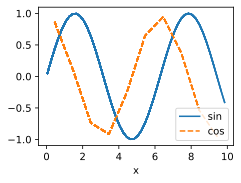

In [133]:
board=d2l.ProgressBoard('x')
for x in np.arange(0,10,0.1):
    board.draw(x,np.sin(x),'sin',every_n=2)
    board.draw(x,np.cos(x),'cos',every_n=10)

In [134]:
class Module(nn.Module,d2l.HyperParameters): #@save
    """The base class of models."""
    def __init__(self,plot_train_per_epoch=2,plot_valid_per_epoch=1,):
        super().save_hyperparameters()
        self.save_hyperparameters()
        self.board=ProgressBoard()
        
    def loss(self,y_hat,y):
        raise NotImplementedError
      
    def forward(self,X):
        assert hasattr(self,'net'),'Neural network is defined'
        return self.net(X)
      
    def plot(self,key,value,train):
        """Plot a point in animation."""
        assert hasattr(self,'trainer'),'Trainer is not inited'
        self.board.xlabel='epoch'
        if train:
            x=self.trainer.train_batch_idx / \
              self.trainer.num_train_batches
            n=self.trainer.num_train_batches / \
              self.plot_train_per_epoch
        else:
            x=self.trainer.epoch+1
            n=self.trainer.num_valid_batches / \
              self.plot_valid_per_epoch
        self.board.draw(x,value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_')+key,
                        every_n=int(n))
    def training_step(self,batch):
        l=self.loss(self(*batch[:-1]),batch[-1])
        self.plot('loss',l,train=True)
        return l
      
    def validation_step(self,batch):
        l=self.loss(self(*batch[:-1]),batch[-1])
        self.plot('loss',l,train=False)
        
    def configure_optimizers(self):
        raise NotImplementedError

In [135]:
class DataModule(d2l.HyperParameters): #@save
    """The base class of data."""
    def __init__(self,root='../data',num_workers=4):
        self.save_hyperparameters()
    
    def get_dataloader(self,train):
        raise NotImplementedError
    
    def train_dataloader(self):
        return self.get_dataloader(train=True)
      
    def val_dataloader(self):
        return self.get_dataloader(train=False)

In [136]:
class Trainer(d2l.HyperParameters): #@save
    """The base class of training models with data."""
    def __init__(self,max_epochs,num_gpus=0,gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus==0,'No GPU support yet'
    
    def prepare_data(self,data):
        self.train_dataloader=data.train_dataloader()
        self.val_dataloader=data.val_dataloader()
        self.num_train_batches=len(self.train_dataloader)
        self.num_valid_batches=(len(self.val_dataloader)
                                if self.val_dataloader is not None else 0)
    
    def prepare_model(self,model):
        model.trainer=self
        model.board.xlim=[0,self.max_epochs]
        self.model=model
    
    def fit(self,model,data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim=model.configure_optimizers()
        self.epoch=0
        self.train_batch_idx=0
        self.val_batch_idx=0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()
    
    def fit_epoch(self):
        raise NotImplementedError

3.4. Linear Regression Implementation from Scratch

In [137]:
%matplotlib inline
import torch
from d2l import torch as d2l

In [147]:
class LinearRegressionScratch(d2l.Module): #@save
    """The linear regression model implemented from scratch."""
    def __init__(self,num_inputs,lr,sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w=torch.normal(0,sigma,(num_inputs,1), requires_grad=True)
        self.b=torch.zeros(1,requires_grad=True)

In [148]:
@d2l.add_to_class(LinearRegressionScratch) #@save
def forward(self,X):
    return torch.matmul(X,self.w)+self.b

In [149]:
@d2l.add_to_class(LinearRegressionScratch) #@save
def loss(self,y_hat,y):
  l=(y_hat-y)**2/2
  return l.mean()

In [150]:
class SGD(d2l.HyperParameters): #@save
    """Minibatch stochastic gradient descent."""
    def __init__(self,params,lr):
        self.save_hyperparameters()
        
    def step(self):
        for param in self.params:
            param-=self.lr*param.grad
            
    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [151]:
@d2l.add_to_class(LinearRegressionScratch) #@save
def configure_optimizers(self):
    return SGD([self.w,self.b],self.lr)

In [152]:
@d2l.add_to_class(d2l.Trainer) #@save
def prepare_batch(self,batch):
    return batch

@d2l.add_to_class(d2l.Trainer) #@save
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss=self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val>0: # To be discussed later
                self.clip_gradients(self.gradient_clip_val,self.model)
            self.optim.step()
        self.train_batch_idx+=1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx+=1

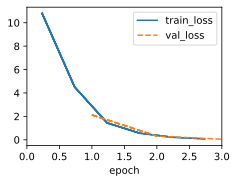

In [153]:
model=LinearRegressionScratch(2,lr=0.03)
data=d2l.SyntheticRegressionData(w=torch.tensor([2,-3.4]),b=4.2)
trainer=d2l.Trainer(max_epochs=3)
trainer.fit(model,data)

In [154]:
with torch.no_grad():
    print(f'error in estimating w: {data.w-model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b-model.b}')

error in estimating w: tensor([ 0.0703, -0.2036])
error in estimating b: tensor([0.2255])


4.1. Softmax Regression

4.2. The Image Classification Dataset

In [2]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [3]:
class FashionMNIST(d2l.DataModule): #@save
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64,resize=(28,28)):
        super().__init__()
        self.save_hyperparameters()
        trans=transforms.Compose([transforms.Resize(resize),
                                  transforms.ToTensor()])
        self.train=torchvision.datasets.FashionMNIST(
            root=self.root,train=True,transform=trans,download=True)
        self.val=torchvision.datasets.FashionMNIST(
            root=self.root,train=False,transform=trans,download=True)

In [4]:
data=FashionMNIST(resize=(32,32))
len(data.train),len(data.val)

100%|██████████| 26421880/26421880 [00:08<00:00, 3086084.43it/s]


Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 97822.75it/s]


Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:03<00:00, 1113748.49it/s]


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 6049951.52it/s]

Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



(60000, 10000)

In [5]:
data.train[0][0].shape

torch.Size([1, 32, 32])

In [6]:
@d2l.add_to_class(FashionMNIST) #@save
def text_labels(self,indices):
    """Return text labels."""
    labels=['t-shirt','trouser','pullover','dress','coat',
            'sandal','shirt','sneaker','bag','ankle boot']
    return [labels[int(i)] for i in indices]

In [7]:
@d2l.add_to_class(FashionMNIST) #@save
def get_dataloader(self,train):
    data=self.train if train else self.val
    return torch.utils.data.DataLoader(data,self.batch_size,shuffle=train,num_workers=self.num_workers)

In [8]:
X,y=next(iter(data.train_dataloader()))
print(X.shape,X.dtype,y.shape,y.dtype)

torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [9]:
tic=time.time()
for X,y in data.train_dataloader():
    continue
f'{time.time()-tic:.2f} sec'

'6.19 sec'

In [10]:
def show_images(imgs,num_rows,num_cols,titles=None,scale=1.5): #@save
    """Plot a list of images."""
    raise NotImplementedError

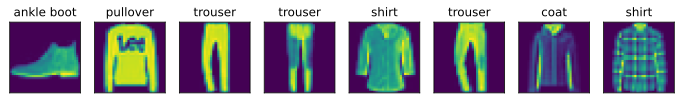

In [12]:
@d2l.add_to_class(FashionMNIST) #@save
def visualize(self,batch,nrows=1,ncols=8,labels=[]):
    X,y=batch
    if not labels:
        labels=self.text_labels(y)
    d2l.show_images(X.squeeze(1),nrows,ncols,titles=labels)
batch=next(iter(data.val_dataloader()))
data.visualize(batch)

4.3. The Base Classification Model

In [13]:
import torch
from d2l import torch as d2l

In [14]:
class Classifier(d2l.Module): #@save
    """The base class of classification models."""
    def validation_step(self,batch):
        Y_hat=self(*batch[:-1])
        self.plot('loss',self.loss(Y_hat,batch[-1]),train=False)
        self.plot('acc',self.accuracy(Y_hat,batch[-1]),train=False)

In [15]:
@d2l.add_to_class(d2l.Module) #@save
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(),lr=self.lr)

In [16]:
@d2l.add_to_class(Classifier) #@save
def accuracy(self,Y_hat,Y,averaged=True):
    """Compute the number of correct predictions."""
    Y_hat=Y_hat.reshape((-1,Y_hat.shape[-1]))
    preds=Y_hat.argmax(axis=1).type(Y.dtype)
    compare=(preds==Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

4.4. Softmax Regression Implementation from Scratch

In [17]:
import torch
from d2l import torch as d2l

In [20]:
X=torch.tensor([[1.0,2.0,3.0],[4.0,5.0,6.0]])
X.sum(0,keepdims=True),X.sum(1,keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [21]:
def softmax(X):
    X_exp=torch.exp(X)
    partition=X_exp.sum(1,keepdims=True)
    return X_exp/partition # The broadcasting mechanism is applied here

In [22]:
X=torch.rand((2,5))
X_prob=softmax(X)
X_prob,X_prob.sum(1)

(tensor([[0.1694, 0.2351, 0.2569, 0.2024, 0.1361],
         [0.1712, 0.1930, 0.3040, 0.1436, 0.1881]]),
 tensor([1.0000, 1.0000]))

In [24]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self,num_inputs,num_outputs,lr,sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w=torch.normal(0,sigma,size=(num_inputs,num_outputs),requires_grad=True)
        self.b=torch.zeros(num_outputs,requires_grad=True)
    
    def parameters(self):
        return [self.w,self.b]

In [25]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self,X):
    X=X.reshape((-1,self.w.shape[0]))
    return softmax(torch.matmul(X,self.w)+self.b)

In [26]:
y=torch.tensor([0,2])
y_hat=torch.tensor([[0.1,0.3,0.6],[0.3,0.2,0.5]])
y_hat[[0,1],y]

tensor([0.1000, 0.5000])

In [27]:
def cross_entropy(y_hat,y):
    return -torch.log(y_hat[range(len(y_hat)),y]).mean()

cross_entropy(y_hat,y)

tensor(1.4979)

In [28]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self,y_hat,y):
    return cross_entropy(y_hat,y)

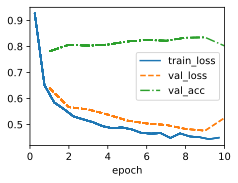

In [29]:
data=d2l.FashionMNIST(batch_size=256)
model=SoftmaxRegressionScratch(num_inputs=784,num_outputs=10,lr=0.1)
trainer=d2l.Trainer(max_epochs=10)
trainer.fit(model,data)

In [30]:
X,y=next(iter(data.val_dataloader()))
preds=model(X).argmax(axis=1)
preds.shape

torch.Size([256])

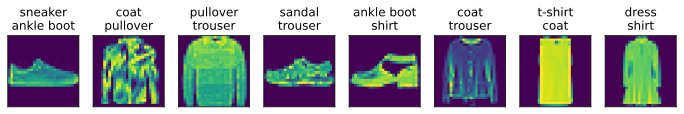

In [31]:
wrong=preds.type(y.dtype)!=y
X,y,pres=X[wrong],y[wrong],preds[wrong]
labels=[a+'\n'+b for a,b in zip(
  data.text_labels(y),data.text_labels(preds))]
data.visualize((X,y),labels=labels)